###### <font color = 'grey'> Import the self-built python modules

In [1]:
import os

In [2]:
os.getcwd()

'C:\\Users\\Olanrewaju Adegoke\\Desktop\\TechTern\\mywork\\Convolution_Neural_Network\\chest_xray_project\\notebooks'

In [3]:
os.chdir('C:\\Users\\Olanrewaju Adegoke\\Desktop\\TechTern\\mywork\\Convolution_Neural_Network\\chest_xray_project\\resources')
os.getcwd()

'C:\\Users\\Olanrewaju Adegoke\\Desktop\\TechTern\\mywork\\Convolution_Neural_Network\\chest_xray_project\\resources'

In [4]:
import olanrewaju as ola

###### <font color = 'grey'> Import other libraries

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import random
import glob

In [324]:
import tensorflow
from tensorflow import keras
import cv2

from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.layers import Conv2D, Flatten, MaxPooling2D, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard
from tensorflow.keras.utils import to_categorical

##### Image Preprocessing

###### Peek at the data folders

In [7]:
os.chdir('C:\\Users\\Olanrewaju Adegoke\\Desktop\\TechTern\\mywork\\Convolution_Neural_Network\\chest_xray_project')

In [8]:
project_path = 'data'

os.walk(project_path)

<generator object walk at 0x00000265F284ECD0>

In [9]:
project_path = 'data'

for dir_name, file, filenames in os.walk(project_path):
    print(dir_name)   # showing the directories
    #print(file)  # showing the subfolders that contains the images
    #print(filenames)  # showing the images in the subfolders

data
data\test
data\test\NORMAL
data\test\PNEUMONIA
data\train
data\train\NORMAL
data\train\PNEUMONIA
data\val
data\val\NORMAL
data\val\PNEUMONIA


In [10]:
project_path = 'data'
count = 0
for dir_name, file, filenames in os.walk(project_path):
   for name in filenames:
       if count < 5:   # This is used to limit the number of images to be loaded
           print(name)
           count += 1

IM-0001-0001.jpeg
IM-0003-0001.jpeg
IM-0005-0001.jpeg
IM-0006-0001.jpeg
IM-0007-0001.jpeg


In [11]:
project_path = 'C:\\Users\\Olanrewaju Adegoke\\Desktop\\TechTern\\mywork\\Convolution_Neural_Network\\chest_xray_project\\data'
count = 0
for dir_name, file, filenames in os.walk(project_path):
   for name in filenames:
       if count < 5:
           print(dir_name, name)
           count += 1

C:\Users\Olanrewaju Adegoke\Desktop\TechTern\mywork\Convolution_Neural_Network\chest_xray_project\data\test\NORMAL IM-0001-0001.jpeg
C:\Users\Olanrewaju Adegoke\Desktop\TechTern\mywork\Convolution_Neural_Network\chest_xray_project\data\test\NORMAL IM-0003-0001.jpeg
C:\Users\Olanrewaju Adegoke\Desktop\TechTern\mywork\Convolution_Neural_Network\chest_xray_project\data\test\NORMAL IM-0005-0001.jpeg
C:\Users\Olanrewaju Adegoke\Desktop\TechTern\mywork\Convolution_Neural_Network\chest_xray_project\data\test\NORMAL IM-0006-0001.jpeg
C:\Users\Olanrewaju Adegoke\Desktop\TechTern\mywork\Convolution_Neural_Network\chest_xray_project\data\test\NORMAL IM-0007-0001.jpeg


In [12]:
project_path = 'C:\\Users\\Olanrewaju Adegoke\\Desktop\\TechTern\\mywork\\Convolution_Neural_Network\\chest_xray_project\\data'
count = 0
image_list = []
for dir_name, file, filenames in os.walk(project_path):
   for name in filenames:
       if count < 5:
           image_list.append([dir_name, name])
           count += 1
image_list

[['C:\\Users\\Olanrewaju Adegoke\\Desktop\\TechTern\\mywork\\Convolution_Neural_Network\\chest_xray_project\\data\\test\\NORMAL',
  'IM-0001-0001.jpeg'],
 ['C:\\Users\\Olanrewaju Adegoke\\Desktop\\TechTern\\mywork\\Convolution_Neural_Network\\chest_xray_project\\data\\test\\NORMAL',
  'IM-0003-0001.jpeg'],
 ['C:\\Users\\Olanrewaju Adegoke\\Desktop\\TechTern\\mywork\\Convolution_Neural_Network\\chest_xray_project\\data\\test\\NORMAL',
  'IM-0005-0001.jpeg'],
 ['C:\\Users\\Olanrewaju Adegoke\\Desktop\\TechTern\\mywork\\Convolution_Neural_Network\\chest_xray_project\\data\\test\\NORMAL',
  'IM-0006-0001.jpeg'],
 ['C:\\Users\\Olanrewaju Adegoke\\Desktop\\TechTern\\mywork\\Convolution_Neural_Network\\chest_xray_project\\data\\test\\NORMAL',
  'IM-0007-0001.jpeg']]

In [14]:
project_path = 'C:\\Users\\Olanrewaju Adegoke\\Desktop\\TechTern\\mywork\\Convolution_Neural_Network\\chest_xray_project\\data'
image_list = []
for dir_name, file, filenames in os.walk(project_path):
   for name in filenames:
       image_list.append([dir_name, name])

In [15]:
len(image_list)

5856

In [16]:
image_list[500]

['C:\\Users\\Olanrewaju Adegoke\\Desktop\\TechTern\\mywork\\Convolution_Neural_Network\\chest_xray_project\\data\\test\\PNEUMONIA',
 'person24_virus_58.jpeg']

In [17]:
image_list[:5]

[['C:\\Users\\Olanrewaju Adegoke\\Desktop\\TechTern\\mywork\\Convolution_Neural_Network\\chest_xray_project\\data\\test\\NORMAL',
  'IM-0001-0001.jpeg'],
 ['C:\\Users\\Olanrewaju Adegoke\\Desktop\\TechTern\\mywork\\Convolution_Neural_Network\\chest_xray_project\\data\\test\\NORMAL',
  'IM-0003-0001.jpeg'],
 ['C:\\Users\\Olanrewaju Adegoke\\Desktop\\TechTern\\mywork\\Convolution_Neural_Network\\chest_xray_project\\data\\test\\NORMAL',
  'IM-0005-0001.jpeg'],
 ['C:\\Users\\Olanrewaju Adegoke\\Desktop\\TechTern\\mywork\\Convolution_Neural_Network\\chest_xray_project\\data\\test\\NORMAL',
  'IM-0006-0001.jpeg'],
 ['C:\\Users\\Olanrewaju Adegoke\\Desktop\\TechTern\\mywork\\Convolution_Neural_Network\\chest_xray_project\\data\\test\\NORMAL',
  'IM-0007-0001.jpeg']]

In [18]:
image_list[3000]

['C:\\Users\\Olanrewaju Adegoke\\Desktop\\TechTern\\mywork\\Convolution_Neural_Network\\chest_xray_project\\data\\train\\PNEUMONIA',
 'person1482_bacteria_3874.jpeg']

#### Image loader function

We need to define the lists for each of the train, test and val files in the dataset.

We need to know the image format type.

We need to know the path to the images.

We need to the labels(target) in the dataset.

You need to first eyebal the images you have before do anything.

In [19]:
project_path = 'C:\\Users\\Olanrewaju Adegoke\\Desktop\\TechTern\\mywork\\Convolution_Neural_Network\\chest_xray_project\\data'

train_list = []
test_list = []
val_list = []

for dir_name, file, filenames in os.walk(project_path):
    if len(filenames) > 0:
        if 'train' in dir_name and 'NORMAL' in dir_name:
            print(dir_name, filenames)

C:\Users\Olanrewaju Adegoke\Desktop\TechTern\mywork\Convolution_Neural_Network\chest_xray_project\data\train\NORMAL ['IM-0115-0001.jpeg', 'IM-0117-0001.jpeg', 'IM-0119-0001.jpeg', 'IM-0122-0001.jpeg', 'IM-0125-0001.jpeg', 'IM-0127-0001.jpeg', 'IM-0128-0001.jpeg', 'IM-0129-0001.jpeg', 'IM-0131-0001.jpeg', 'IM-0133-0001.jpeg', 'IM-0135-0001.jpeg', 'IM-0137-0001.jpeg', 'IM-0140-0001.jpeg', 'IM-0141-0001.jpeg', 'IM-0143-0001.jpeg', 'IM-0145-0001.jpeg', 'IM-0147-0001.jpeg', 'IM-0149-0001.jpeg', 'IM-0151-0001.jpeg', 'IM-0152-0001.jpeg', 'IM-0154-0001.jpeg', 'IM-0156-0001.jpeg', 'IM-0158-0001.jpeg', 'IM-0160-0001.jpeg', 'IM-0162-0001.jpeg', 'IM-0164-0001.jpeg', 'IM-0166-0001.jpeg', 'IM-0168-0001.jpeg', 'IM-0170-0001.jpeg', 'IM-0172-0001.jpeg', 'IM-0176-0001.jpeg', 'IM-0177-0001.jpeg', 'IM-0178-0001.jpeg', 'IM-0180-0001.jpeg', 'IM-0182-0001.jpeg', 'IM-0183-0001.jpeg', 'IM-0185-0001.jpeg', 'IM-0187-0001.jpeg', 'IM-0189-0001.jpeg', 'IM-0191-0001.jpeg', 'IM-0193-0001.jpeg', 'IM-0195-0001.jpeg', '

###### <font color = 'green'> Building the Image Loader function

In [20]:
def Image_Loader_cnn(project_path):
    '''
    Image Loader function for image preprocessing for a deep learning model.
    This function helps to select all training, testing and validation data into their respective list and also categorizing the labels.
    It is an important function to be able to rightly select files accordingly especially when each train, test, val contains subfolrders as labels.

    Inputs:
        project_path: This is location path where the dataset that contains the train, test, val is stored.

    Outputs:
        train_list: This is the list that contains all the selected training images using their labels.
        test_list: This is the list that contains all the selected test images using their labels.
        val_list: This is the list that contains all the selected validation images using their labels.

    Please note that, this function need to be modified depending on the labels in your dataset.
    '''
    train_list = []
    test_list = []
    val_list = []
    
    for dir_name, file, filenames in os.walk(project_path):
        if len(filenames) > 0 and len(dir_name) > 0: # not empty
            if 'train' in dir_name and 'NORMAL' in dir_name:
                for img in filenames:
                    if '.jpeg' in img:
                        train_list.append([dir_name, img, 'NORMAL'])
            elif 'train' in dir_name and 'PNEUMONIA' in dir_name:
                for img in filenames:
                    if '.jpeg' in img:
                        train_list.append([dir_name, img, 'PNEUMONIA'])
    
            
            elif 'test' in dir_name and 'NORMAL' in dir_name:
                for img in filenames:
                    if '.jpeg' in img:
                        test_list.append([dir_name, img, 'NORMAL'])
            elif 'test' in dir_name and 'PNEUMONIA' in dir_name:
                for img in filenames:
                    if '.jpeg' in img:
                        test_list.append([dir_name, img, 'PNEUMONIA'])
    
    
            elif 'val' in dir_name and 'NORMAL' in dir_name:
                for img in filenames: 
                    if '.jpeg' in img:
                        val_list.append([dir_name, img, 'NORMAL'])
            elif 'val' in dir_name and 'PNEUMONIA' in dir_name:
                for img in filenames:
                    if '.jpeg' in img:
                        val_list.append([dir_name, img, 'PNEUMONIA'])
            else:
                print('Check the names of the train, test, val folders and the labels')
        else:
            pass
    return train_list, test_list, val_list

In [21]:
path = 'C:\\Users\\Olanrewaju Adegoke\\Desktop\\TechTern\\mywork\\Convolution_Neural_Network\\chest_xray_project\\data'
train_list, test_list, val_list = Image_Loader_cnn(path)

In [22]:
print(len(train_list), len(test_list), len(val_list))

5216 624 16


In [23]:
train_list[0] # accessing the first element in the train_list

['C:\\Users\\Olanrewaju Adegoke\\Desktop\\TechTern\\mywork\\Convolution_Neural_Network\\chest_xray_project\\data\\train\\NORMAL',
 'IM-0115-0001.jpeg',
 'NORMAL']

In [27]:
train_list[0][0] # this grab the first index element from the first element in the train_list - image path

'C:\\Users\\Olanrewaju Adegoke\\Desktop\\TechTern\\mywork\\Convolution_Neural_Network\\chest_xray_project\\data\\train\\NORMAL'

In [28]:
train_list[0][1] # # this grab the second index element from the first element in the train_list - image name

'IM-0115-0001.jpeg'

In [29]:
train_list[0][2] # this grab the third index element from the first element in the train_list - label

'NORMAL'

In [30]:
train_list[0][0] + '/' + train_list[0][1] # this access and try to concatenate the first and second indexes which are the path and the image I need.

'C:\\Users\\Olanrewaju Adegoke\\Desktop\\TechTern\\mywork\\Convolution_Neural_Network\\chest_xray_project\\data\\train\\NORMAL/IM-0115-0001.jpeg'

In [31]:
img_arr = cv2.imread(train_list[0][0] + '/' + train_list[0][1], cv2.IMREAD_GRAYSCALE) # GRAY_SCALE because the xray is white and black
img_arr   # the cv2.imread() convert the images into array

array([[ 22,  24,  24, ...,  96,  94,  93],
       [ 23,  24,  24, ...,  97,  94,  92],
       [ 24,  24,  23, ...,  99,  96,  94],
       ...,
       [ 49,  50,  48, ..., 119, 119, 119],
       [ 50,  52,  53, ..., 123, 124, 123],
       [ 52,  53,  54, ..., 129, 128, 127]], dtype=uint8)

######  Continue with the img_arr that was converted to array

In [32]:
len(img_arr) # there are 1858 pixels of this image.

1858

In [33]:
img_arr1 = cv2.imread(train_list[1000][0] + '/' + train_list[1000][1], cv2.IMREAD_GRAYSCALE) # GRAY_SCALE because the xray is white and black
img_arr1

array([[ 0,  6,  0, ..., 40, 38, 36],
       [ 0,  6,  0, ..., 39, 39, 38],
       [ 0,  5,  0, ..., 39, 39, 37],
       ...,
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0]], dtype=uint8)

In [34]:
len(img_arr1)

1171

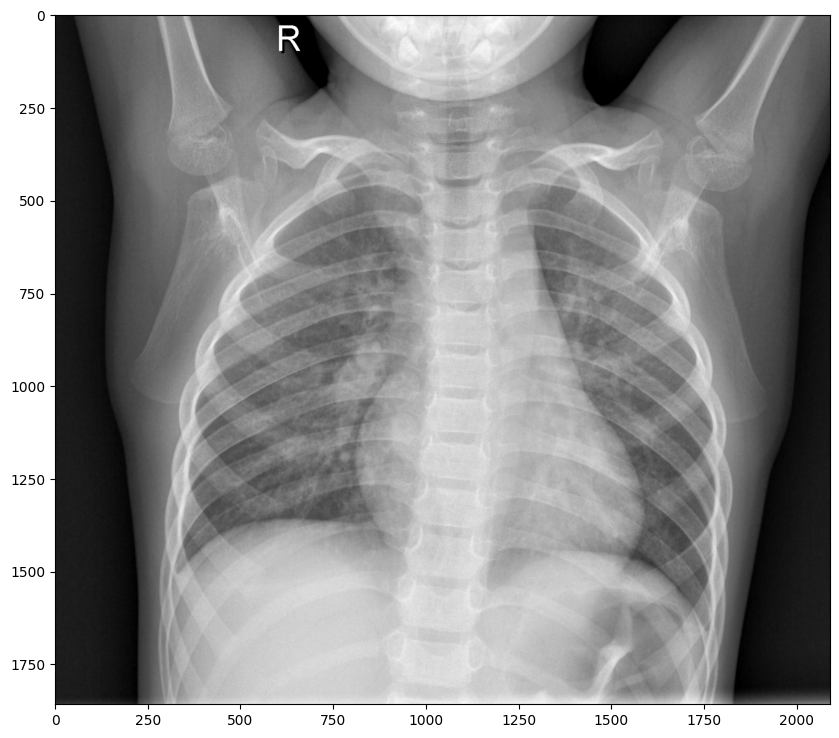

In [35]:
# Visualizing the image
plt.figure(figsize=(10,10))
plt.imshow(img_arr, cmap='gray')

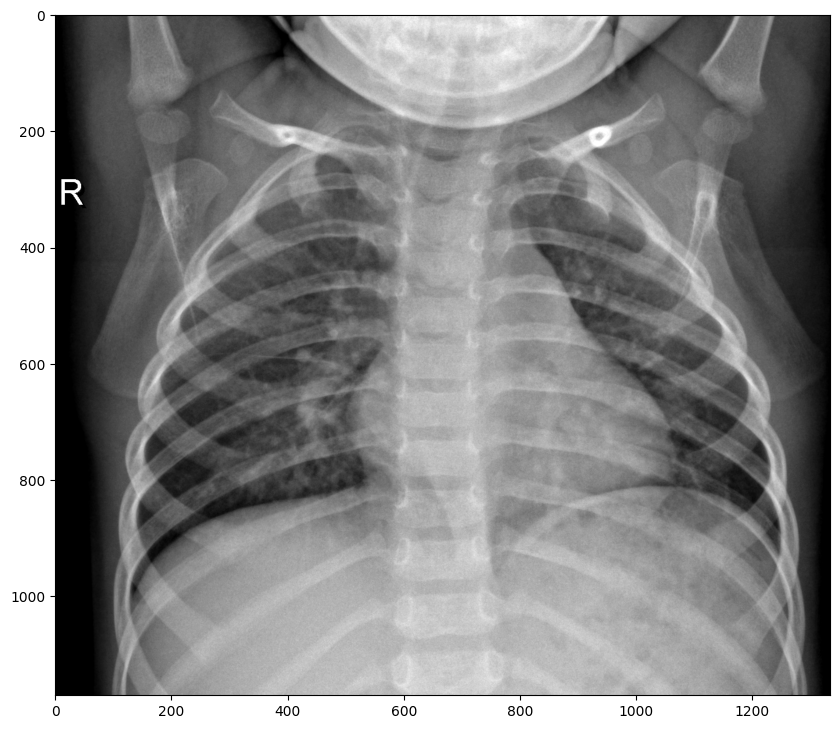

In [36]:
# Visualize the image
plt.figure(figsize=(10,10))
plt.imshow(img_arr1, cmap='gray')

Checking through the images, you will observe that the first image has dimension 0-1800 by 0-2000 and the second image has dimension 0-1200 by 0-1400. Hence, the two images are not of the same size and we must ensure that all images must have the same size.

##### <font color = 'gray'> Image Transformer

##### <font color = 'gray'> Build a function that will resize the images using opencv

##### The full image processor function that uses the image resize function and return an array with the images and the labels, the separated images alone X and the labels y.

###### Full function that resize and preprocess image

In [92]:
def resize_image_cnn(data_list,size):
    '''
    This function resize images and extract the image and its corresponding label in the data_list.
    Inputs:
        data_list: This is the data list of images we have extracted and classified as training, test or validation.
        size: This is the size of the image or dimension we want the image to be resized to. It must be a tuple e.g (150, 150).

    Outputs:
        This function returns three outputs.
        1.features: This is an array of all resized images without the labels. It serves as the feautres of the dataset.
        2.labels: This is the list of all labels in the given dataset/image.
        3.feat_label: This is a list that contains the resized array and the labels.

    Please note: To use this function, you will need to have properly extract and load your images into there respective list as train, test or validation.
    '''
    feat_label = []
    features = []
    labels = []
    for path, image, label in data_list:
        img = cv2.imread(os.path.join(path, image), cv2.IMREAD_GRAYSCALE)
        if img is None:
            continue
        img = cv2.resize(img, size)
        features.append(img)
        labels.append(label)
        feat_label.append([img, label])
    return np.array(features), labels, feat_label

In [87]:
def normalized_cnn(reshaped_image):
    '''
    This function is used to normalize an numpy.ndarray images such that the values lies between [0, 1].
    Input:
        reshaped_image: This is an array of images that is already reshaped by the defined dimension or size.
    Output:
        norm_img: This is a normalized numpy.ndarray of the images with values between 0 and 1 both inclusive.
        It is the resultant array to be used for the deep learning model training.
    '''
    norm_img = reshaped_image.astype('float32') / 255.0  
    return norm_img

In [88]:
def label_encoding_cnn(labels, encoder):
    '''
    This function convert a categorical labels in of an image into numerical encoding by using label encoder and one-hot encoder.
    To use the function, you would need to import tensorflow libraries and labelencoder:
        from sklern.preprocessing import LabelEncoder
        from tensorflow.keras.utils import to_categorical
    Inputs:
        labels: This is the list of all the labels as obtain from the dataset or created.
        encoder: This is the instantiation of the choice of encoder to use. Here,
                  we recommend using the Label encoding which will first encode the strings into numerical.

    Output:
        encoded_label: This is the encoded binary array of the original labels that will be used for the deep learning model.
    '''
    label_encoder = encoder
    label_encoder.fit(labels)
    encoded_label = label_encoder.transform(labels)
    label_class = label_encoder.classes_
    encoded_label = to_categorical(encoded_label, num_classes=len(label_class))
    return encoded_label

#### <font color='green'> Preprocessing the Training data

**To preprocess the training data, we have to resize, reshape, normalize and encode the labels.**

In [165]:
len(train_list)

5216

###### <font color = 'green'> Resize the image

In [166]:
data_list = train_list
size = (224, 224)
train_feat, train_label, train_feat_label = resize_image_cnn(data_list,size)

In [167]:
train_feat[0]

array([[ 24,  20,  19, ...,  95,  94,  95],
       [ 22,  22,  17, ...,  91,  95,  95],
       [ 24,  21,  20, ...,  93,  93,  92],
       ...,
       [ 29,  29,  29, ...,  61,  59,  59],
       [ 34,  33,  35, ...,  79,  81,  82],
       [ 46,  45,  45, ..., 108, 113, 110]], dtype=uint8)

In [168]:
train_feat.shape

(5216, 224, 224)

In [169]:
train_label[0]

'NORMAL'

In [170]:
train_feat_label[0]

[array([[ 24,  20,  19, ...,  95,  94,  95],
        [ 22,  22,  17, ...,  91,  95,  95],
        [ 24,  21,  20, ...,  93,  93,  92],
        ...,
        [ 29,  29,  29, ...,  61,  59,  59],
        [ 34,  33,  35, ...,  79,  81,  82],
        [ 46,  45,  45, ..., 108, 113, 110]], dtype=uint8),
 'NORMAL']

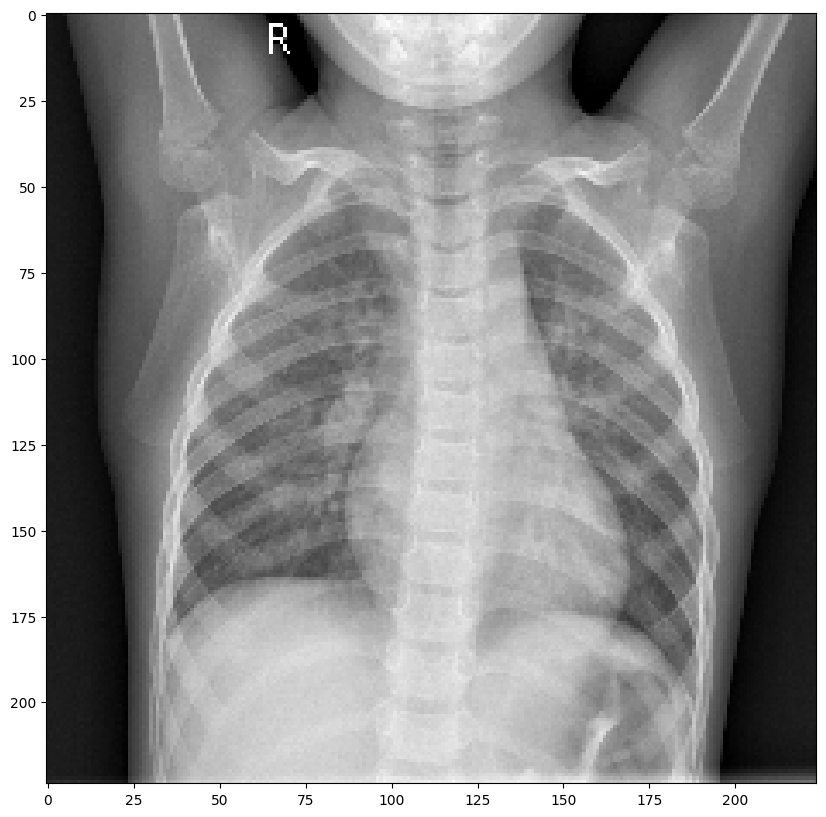

In [171]:
# Visualize the resized image
plt.figure(figsize=(10, 10))
plt.imshow(train_feat[0], cmap=plt.cm.grey)

###### <font color = 'green'> Reshape the images

###### <font color = 'green'> Normalize the image

In [172]:
reshaped_image = train_feat
train_feat_norm = normalized_cnn(reshaped_image)

In [174]:
train_feat_norm.shape

(5216, 224, 224)

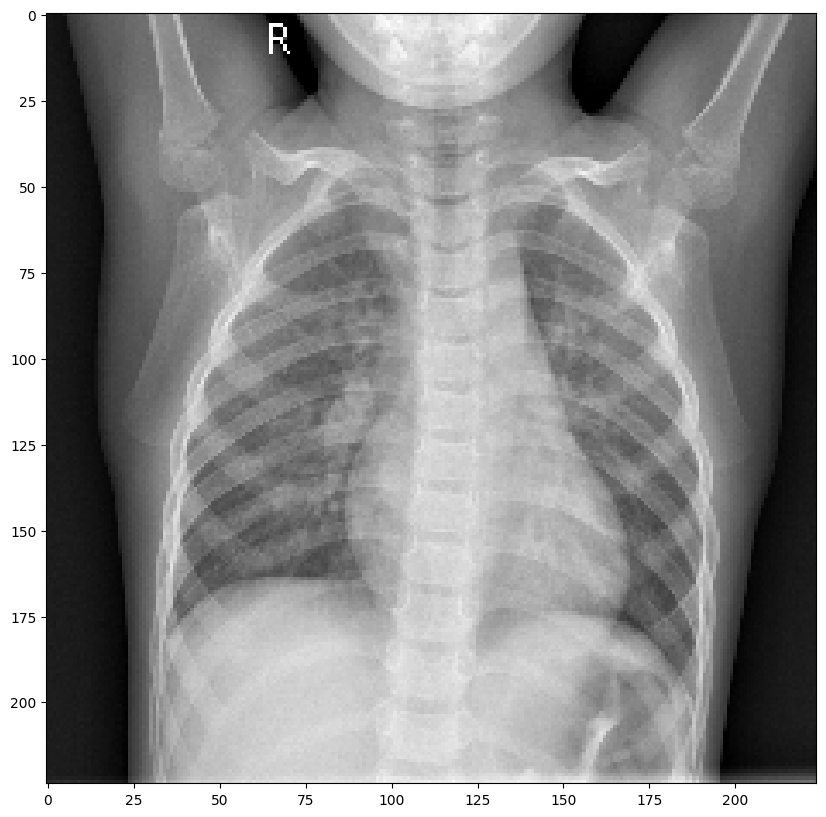

In [173]:
# Visualize the normalized image
plt.figure(figsize=(10, 10))
plt.imshow(train_feat_norm[0], cmap='grey')

###### <font color = 'green'> Encode the labels

In [122]:
labels = train_label
encoder = LabelEncoder()
encoded_train_label = label_encoding_cnn(labels, encoder)

In [124]:
encoded_train_label[0]

array([1., 0.])

In [125]:
encoded_train_label.shape

(5216, 2)

#### <font color='green'> Preprocessing the validation data

In [126]:
len(val_list)

16

###### <font color = 'green'> Resize the validation image

In [175]:
data_list = val_list
size = (224, 224)
val_feat, val_label, val_feat_label = resize_image_cnn(data_list,size)

In [176]:
val_feat.shape

(16, 224, 224)

In [129]:
val_label[0]

'NORMAL'

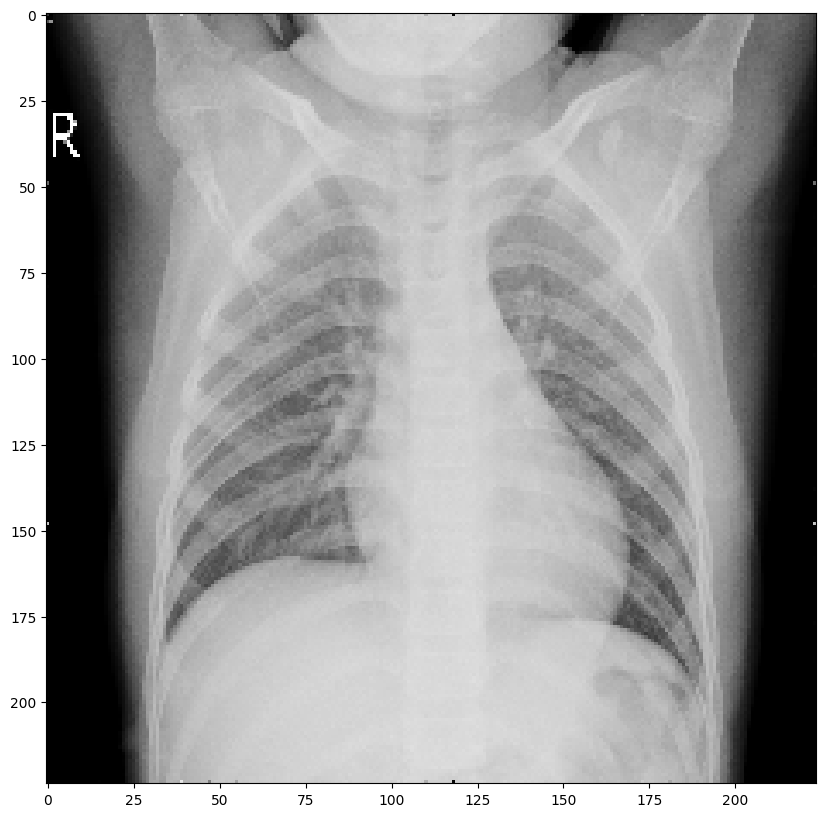

In [132]:
plt.figure(figsize=(10, 10))
plt.imshow(val_feat[0], cmap='gray')

###### <font color = 'green'> Reshape the validation image

###### <font color = 'green'> Normalized the validation image

In [177]:
reshaped_image = val_feat
val_feat_norm = normalized_cnn(reshaped_image)

In [178]:
val_feat_norm.shape

(16, 224, 224)

###### <font color = 'green'> Encode the validation labels

In [138]:
labels = val_label
encoder = LabelEncoder()
encoded_val_label = label_encoding_cnn(labels, encoder)

In [139]:
encoded_val_label.shape

(16, 2)

In [141]:
encoded_val_label[0]

array([1., 0.])

#### <font color = 'green'> Preprocessing the Test data

In [183]:
len(test_list)

624

###### <font color = 'green'> Resized the test image

In [184]:
data_list = test_list
size = (224, 224)
test_feat, test_label, test_feat_label = resize_image_cnn(data_list,size)

In [185]:
test_feat[0]

array([[32, 32, 32, ..., 32, 30, 35],
       [32, 32, 29, ..., 30, 33, 33],
       [32, 32, 34, ..., 32, 34, 31],
       ...,
       [32, 30, 28, ..., 33, 33, 32],
       [29, 27, 29, ..., 32, 33, 35],
       [31, 31, 29, ..., 33, 31, 34]], dtype=uint8)

In [186]:
test_feat.shape

(624, 224, 224)

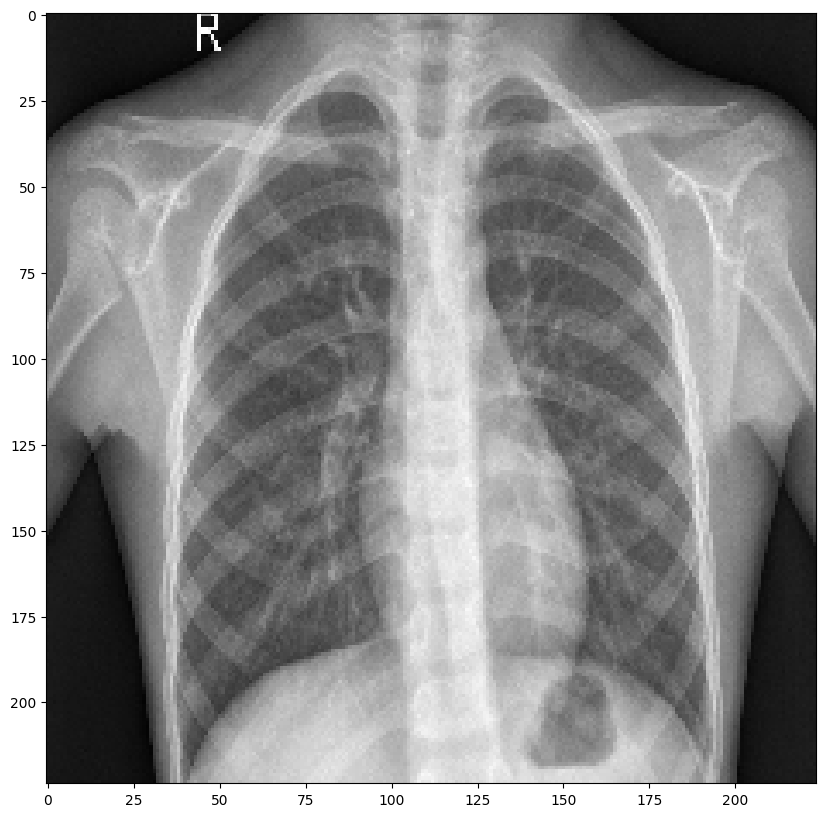

In [187]:
plt.figure(figsize=(10, 10))
plt.imshow(test_feat[0], cmap='gray')

In [188]:
test_label[0]

'NORMAL'

###### <font color = 'green'> Reshape the test image

###### <font color = 'green'> Normalizing the test image

In [189]:
reshaped_image = test_feat
test_feat_norm = normalized_cnn(reshaped_image)

In [190]:
test_feat_norm[0]

array([[0.1254902 , 0.1254902 , 0.1254902 , ..., 0.1254902 , 0.11764706,
        0.13725491],
       [0.1254902 , 0.1254902 , 0.11372549, ..., 0.11764706, 0.12941177,
        0.12941177],
       [0.1254902 , 0.1254902 , 0.13333334, ..., 0.1254902 , 0.13333334,
        0.12156863],
       ...,
       [0.1254902 , 0.11764706, 0.10980392, ..., 0.12941177, 0.12941177,
        0.1254902 ],
       [0.11372549, 0.10588235, 0.11372549, ..., 0.1254902 , 0.12941177,
        0.13725491],
       [0.12156863, 0.12156863, 0.11372549, ..., 0.12941177, 0.12156863,
        0.13333334]], dtype=float32)

In [191]:
test_feat_norm.shape

(624, 224, 224)

###### <font color = 'green'> Encode the test labels

In [192]:
labels = test_label
encoder = LabelEncoder()
encoded_test_label = label_encoding_cnn(labels, encoder)

In [193]:
encoded_test_label[0]

array([1., 0.])

In [194]:
encoded_test_label.shape

(624, 2)

In [195]:
print(f"Train features shape: {train_feat_norm.shape}")
print(f"Train labels shape: {encoded_train_label.shape}")
print(f"Validation features shape: {val_feat_norm.shape}")
print(f"Validation labels shape: {encoded_val_label.shape}")
print(f"Test features shape: {test_feat_norm.shape}")
print(f"Test labels shape: {encoded_test_label.shape}")

Train features shape: (5216, 224, 224)
Train labels shape: (5216, 2)
Validation features shape: (16, 224, 224)
Validation labels shape: (16, 2)
Test features shape: (624, 224, 224)
Test labels shape: (624, 2)


#### <font color = 'green'> Build the Convolutional Neural Network Model Using the Sequential

###### <font color = 'grey'> Define the CNN architecture

In [280]:
target_size = 224

model = Sequential()

model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu', input_shape=(target_size, target_size, 1)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(200,activation='relu'))
model.add(Dense(100,activation='relu'))
model.add(Dense(50,activation='relu'))

model.add(Dense(2,activation='softmax'))

C:\Users\Olanrewaju Adegoke\Desktop\TechTern\mywork\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


###### <font color = 'grey'> Compile the model

In [281]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

###### <font color = 'grey'> Model Summary

In [282]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_15 (Conv2D)                   │ (None, 222, 222, 128)       │           1,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_14 (MaxPooling2D)      │ (None, 111, 111, 128)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 109, 109, 64)        │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_15 (MaxPooling2D)      │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 52, 52, 32)          │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_16 (MaxPooling2D)      │ (None, 26, 26, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 21632)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 200)                 │       4,326,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 100)                 │          20,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 50)                  │           5,050 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 2)                   │             102 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,445,388 (16.96 MB)

 Trainable params: 4,445,388 (16.96 MB)

 Non-trainable params: 0 (0.00 B)

###### <font color = 'green'> Train the model

In [283]:
BATCH_SIZE = 16
EPOCHS = 1

# Set up callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=1)  # Stop training if validation loss doesn't improve for 1 epochs
tensorboard = TensorBoard(log_dir='./logs')  # Track training progress in TensorBoard (optional)


model.fit(train_feat_norm, encoded_train_label, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_data=(val_feat_norm,encoded_val_label), verbose=1,  callbacks=[early_stopping, tensorboard])

326/326 ━━━━━━━━━━━━━━━━━━━━ 494s 1s/step - accuracy: 0.8391 - loss: 0.3722 - val_accuracy: 0.9375 - val_loss: 0.1603


In [284]:
hist = model

#### <font color = 'green'> Evaluate the model

In [196]:
loss, accuracy = model.evaluate(test_feat_norm, encoded_test_label)
print('Test accuracy:', accuracy)
print(' ')
print('Test loss:', loss)

20/20 ━━━━━━━━━━━━━━━━━━━━ 12s 561ms/step - accuracy: 0.6657 - loss: 1.3680
Test accuracy: 0.8108974099159241
 
Test loss: 0.7853323817253113


#### <font color = 'green'> Predicting the test class

In [211]:
pred_prob = model.predict(test_feat_norm)
pred_prob

20/20 ━━━━━━━━━━━━━━━━━━━━ 11s 544ms/step


array([[9.4003624e-01, 5.9963793e-02],
       [4.2340904e-01, 5.7659096e-01],
       [3.3178467e-02, 9.6682155e-01],
       ...,
       [2.2276749e-03, 9.9777228e-01],
       [6.3862361e-04, 9.9936134e-01],
       [4.1852952e-03, 9.9581474e-01]], dtype=float32)

In [212]:
test_image = test_feat_norm[0]

In [213]:
predictions = model.predict(np.expand_dims(test_image, axis=0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step


In [214]:
predclass = np.argmax(predictions)
predclass

0

In [215]:
class_names = ['NORMAL', 'PNEUMONIA']
print('The predicted xray label is:', class_names[predclass])

The predicted xray label is: NORMAL


##### Other codes for Prediction

In [287]:
predicted_labels = model.predict(test_feat_norm)

20/20 ━━━━━━━━━━━━━━━━━━━━ 13s 565ms/step


In [288]:
# Get the index of the maximum probability class

In [289]:
predicted_classes = np.argmax(predicted_labels, axis=1)  

In [307]:
predicted_classes[50]

0

In [308]:
class_names = ['NORMAL', 'PNEUMONIA']
print('The predicted xray label is:', class_names[predicted_classes[50]])

The predicted xray label is: NORMAL


##### Confusion Matrix

Confusion Matrix: 

[[ 85 149]
 [  3 387]]


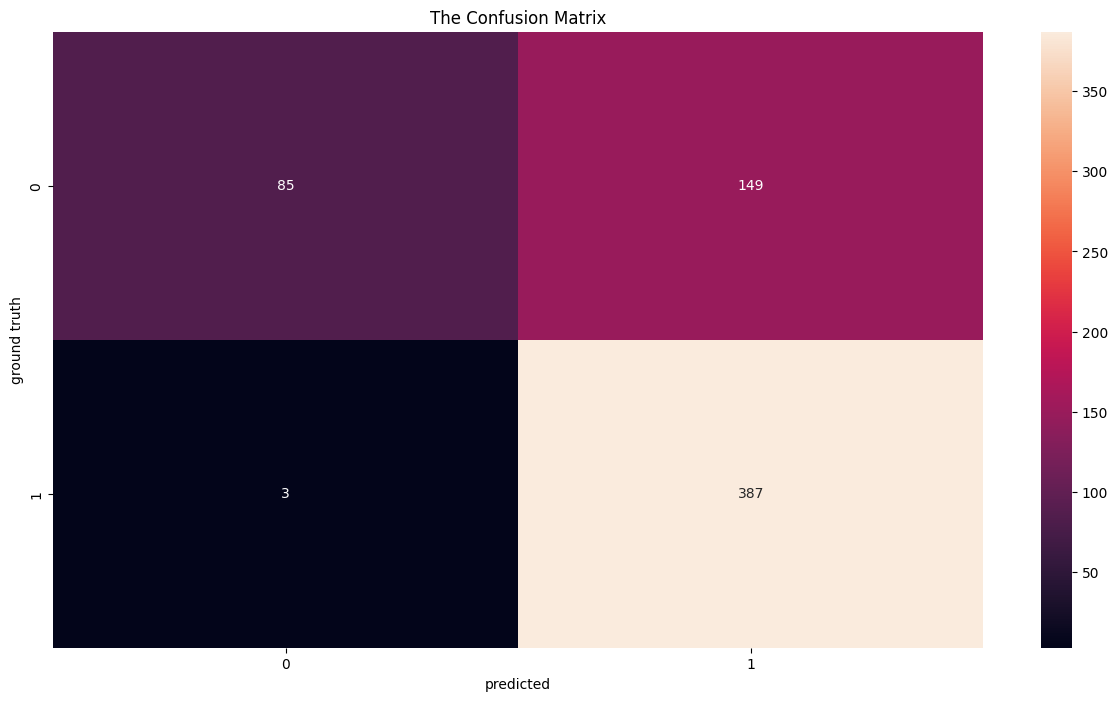

In [311]:
from sklearn.metrics import confusion_matrix
# Create confusion mateix
conf_mat = confusion_matrix(encoded_test_label.argmax(axis=1), predicted_classes)
# Print confusion matrix
print("Confusion Matrix: \n")
print(conf_mat)

# Displaying the Confusion Matrix
plt.figure(figsize=(15,8))

sb.heatmap(conf_mat, annot=True, fmt='d')
plt.xlabel('predicted')
plt.ylabel('ground truth')
plt.title('The Confusion Matrix')
plt.show()

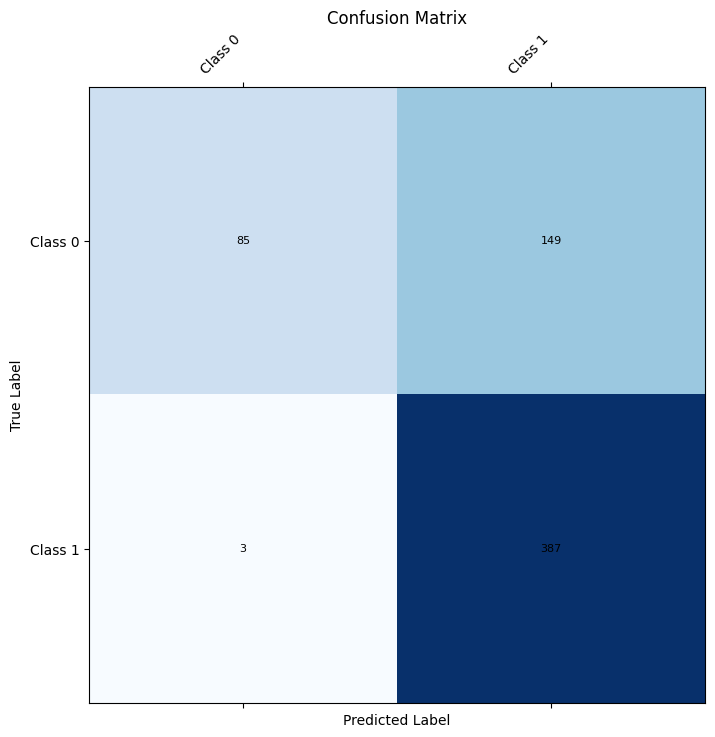

In [312]:
# Define labels for the confusion matrix
class_labels = [f'Class {i}' for i in range(2)]

fig, ax = plt.subplots(figsize=(15, 8))
ax.matshow(conf_mat, cmap='Blues')

# Add labels and title
for (i, j), z in np.ndenumerate(conf_mat):
    ax.text(j, i, f'{z}', ha='center', va='center', fontsize=8)
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
ax.set_xticks(np.arange(len(class_labels)))
ax.set_yticks(np.arange(len(class_labels)))
ax.set_xticklabels(class_labels, rotation=45, ha='right')
ax.set_yticklabels(class_labels)
plt.title('Confusion Matrix')
plt.show()

## <font color = 'green'> Using the 'glob' function to load images

In [242]:
import glob

In [243]:
os.getcwd()

'C:\\Users\\Olanrewaju Adegoke\\Desktop\\TechTern\\mywork\\Convolution_Neural_Network\\chest_xray_project'

In [244]:
path = 'C:\\Users\\Olanrewaju Adegoke\\Desktop\\TechTern\\mywork\\Convolution_Neural_Network\\chest_xray_project\\data'

In [245]:
train_data = glob.glob(path + '/' + 'train/**/*.jpeg')
len(train_data)

5216

In [246]:
test_data = glob.glob(path + '/' + 'test/**/*.jpeg')
len(test_data)

624

In [247]:
val_data = glob.glob(path + '/' + 'val/**/*.jpeg')
len(val_data)

16

In [248]:
train_data[0]

'C:\\Users\\Olanrewaju Adegoke\\Desktop\\TechTern\\mywork\\Convolution_Neural_Network\\chest_xray_project\\data/train\\NORMAL\\IM-0115-0001.jpeg'

In [249]:
train_data[0][116:133]

'IM-0115-0001.jpeg'

In [250]:
from tensorflow.keras.layers import Conv2D, Flatten, MaxPooling2D, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [251]:
trainGen = ImageDataGenerator(
    rescale=1/255.,
    horizontal_flip=True,
    vertical_flip=True,
    rotation_range=0.4,
    zoom_range=0.4    
)

In [252]:
valGen = ImageDataGenerator(
    rescale=1/255.
)

In [253]:
# Used for training the model
train_path = 'C:\\Users\\Olanrewaju Adegoke\\Desktop\\TechTern\\mywork\\Convolution_Neural_Network\\chest_xray_project\\data\\train'

trainSet = trainGen.flow_from_directory(
    train_path,
    target_size=(224,224),
    batch_size=16
)

Found 5216 images belonging to 2 classes.


In [254]:
# To be used to probe the model robustness after training
test_path = 'C:\\Users\\Olanrewaju Adegoke\\Desktop\\TechTern\\mywork\\Convolution_Neural_Network\\chest_xray_project\\data\\test'

testSet = trainGen.flow_from_directory(
    test_path,
    target_size=(224,224),
    batch_size=16
)

Found 624 images belonging to 2 classes.


In [255]:
# To be used to examine the performance of the model while training
val_path = 'C:\\Users\\Olanrewaju Adegoke\\Desktop\\TechTern\\mywork\\Convolution_Neural_Network\\chest_xray_project\\data\\val'

valSet = valGen.flow_from_directory(
    val_path,
    target_size=(224,224),
    batch_size=4
)

Found 16 images belonging to 2 classes.


In [256]:
batch_size = 16
print(f"One epoch is {len(train_data)/batch_size} complete time and continue until the last epoch.")

One epoch is 326.0 complete time and continue until the last epoch.


##### <font color = 'red'> Build the CNN model

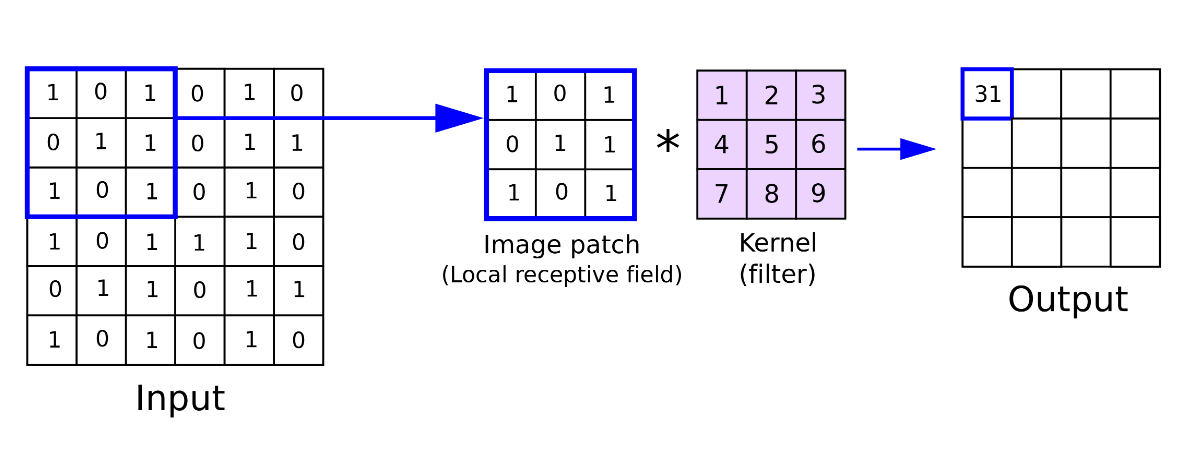

In [320]:
model1 = Sequential()

model1.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu', input_shape=(224, 224, 3)))
model1.add(MaxPooling2D(pool_size=(2,2)))

model1.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu'))
model1.add(MaxPooling2D(pool_size=(2,2)))

model1.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model1.add(MaxPooling2D(pool_size=(2,2)))

model1.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
model1.add(MaxPooling2D(pool_size=(2,2)))

model1.add(Flatten())

model1.add(Dense(256,activation='relu'))
model1.add(Dense(128,activation='relu'))
model1.add(Dense(64,activation='relu'))

model1.add(Dense(2, activation='softmax'))

C:\Users\Olanrewaju Adegoke\Desktop\TechTern\mywork\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [321]:
# Compile the model

model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [322]:
# Summarize the model

model1.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_18 (Conv2D)                   │ (None, 222, 222, 128)       │           3,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_17 (MaxPooling2D)      │ (None, 111, 111, 128)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_19 (Conv2D)                   │ (None, 109, 109, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_18 (MaxPooling2D)      │ (None, 54, 54, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_20 (Conv2D)                   │ (None, 52, 52, 64)          │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_19 (MaxPooling2D)      │ (None, 26, 26, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_21 (Conv2D)                   │ (None, 24, 24, 32)          │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_20 (MaxPooling2D)      │ (None, 12, 12, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ (None, 4608)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 256)                 │       1,179,904 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 2)                   │             130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,464,610 (5.59 MB)

 Trainable params: 1,464,610 (5.59 MB)

 Non-trainable params: 0 (0.00 B)

In [156]:
# Train the model

In [323]:
num_epoch = 1

hist = model1.fit(trainSet, epochs=num_epoch, validation_data=valSet, verbose=1)

326/326 ━━━━━━━━━━━━━━━━━━━━ 947s 3s/step - accuracy: 0.7375 - loss: 0.5707 - val_accuracy: 0.6250 - val_loss: 0.8727
